In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [ ]:
train_dataset.isna().sum()

Id          0
yearID      0
S           0
2B          0
3B          0
HR          0
BB          0
HBP       105
SH        195
SF        546
OIP         0
SO         53
GIDP      460
SB         81
CS        412
R           0
dtype: int64

In [ ]:
train_dataset = train_dataset.interpolate(method='linear', limit_direction ='forward')

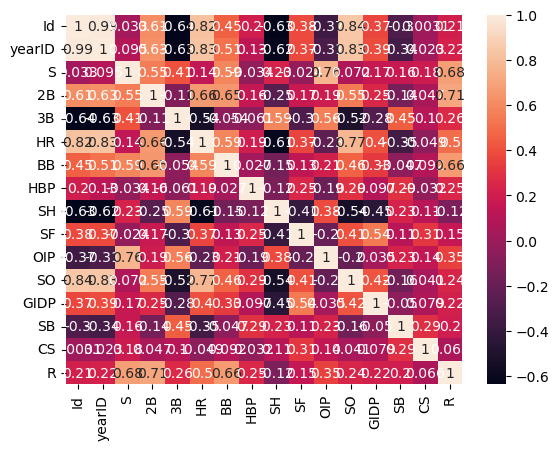

In [ ]:
corr = train_dataset.corr()

sns.heatmap(corr, annot=True)

plt.show()


In [ ]:
#train_dataset = train_dataset.drop("CS",axis=1)

In [ ]:
train_dataset.columns

Index(['Id', 'yearID', 'S', '2B', '3B', 'HR', 'BB', 'HBP', 'SH', 'SF', 'OIP',
       'SO', 'GIDP', 'SB', 'CS', 'R'],
      dtype='object')

In [ ]:
X = train_dataset.iloc[:,1:-1].to_numpy()
X = np.c_[np.ones(X.shape[0]), X]
y = train_dataset.iloc[:,-1].to_numpy().reshape(-1,1)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1295)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import SGDRegressor
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet

#model = Lasso(alpha=4000)
#model = ElasticNet()
#model = SGDRegressor(fit_intercept=False,)
model = LinearRegression(fit_intercept=False)

model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [ ]:
model.score(X_train, y_train)

0.9023798791711203

In [ ]:
model.score(X_test, y_test)

0.9332950925057878

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

np.sqrt(mse)

33.47351216621378

In [ ]:
model.fit(X,y)

LinearRegression(fit_intercept=False)

## test.csv

In [ ]:
test_dataset = test_dataset.interpolate(method='linear', limit_direction ='forward')
#test_dataset=test_dataset.drop("CS", axis=1)
test_dataset.head()

,Id,yearID,S,2B,3B,HR,BB,HBP,SH,SF,OIP,SO,GIDP,SB,CS
0,2331,2000,948,272,23,183,632,54.0,89.0,45.0,2097,1120.0,114.0,93.0,37.0
1,2477,2005,980,296,27,189,447,54.0,40.0,42.0,2429,902.0,145.0,83.0,37.0
2,798,1925,1198,251,71,56,541,44.0,208.0,0.0,2402,420.0,0.0,135.0,92.0
3,2159,1994,771,211,36,124,388,29.0,53.0,42.0,1524,738.0,83.0,119.0,51.0
4,2630,2010,940,298,27,149,479,50.0,60.0,38.0,2111,1236.0,124.0,55.0,31.0


In [ ]:
test = test_dataset.iloc[:,1:].to_numpy()
test = np.c_[np.ones(test.shape[0]), test]
test.shape

(955, 15)

In [ ]:
test[0]

array([1.000e+00, 2.000e+03, 9.480e+02, 2.720e+02, 2.300e+01, 1.830e+02,
       6.320e+02, 5.400e+01, 8.900e+01, 4.500e+01, 2.097e+03, 1.120e+03,
       1.140e+02, 9.300e+01, 3.700e+01])

In [ ]:
test_predict = model.predict(test)
test_predict

array([[ 744.9540723 ],
       [ 761.33756178],
       [ 786.98844629],
       [ 607.21489577],
       [ 668.38057055],
       [ 719.21881675],
       [ 651.92514268],
       [ 706.88494551],
       [ 731.30347127],
       [ 723.82037741],
       [ 806.7588834 ],
       [ 517.14944519],
       [ 671.62698489],
       [ 537.42368645],
       [ 566.55755853],
       [ 574.8275608 ],
       [ 611.79426538],
       [ 619.08500826],
       [ 663.59348997],
       [ 631.54686595],
       [ 540.86151506],
       [ 457.67651881],
       [ 865.16659893],
       [ 596.12468939],
       [ 794.74232739],
       [1092.96556058],
       [ 890.92592102],
       [ 651.91855278],
       [ 573.80872565],
       [ 675.1484539 ],
       [ 785.8560743 ],
       [ 819.42330534],
       [ 634.25721173],
       [ 883.95301509],
       [ 876.72529253],
       [ 701.90973695],
       [ 728.83253581],
       [ 715.23091412],
       [ 793.94815167],
       [ 553.65061892],
       [ 549.36081046],
       [ 756.439

In [ ]:
test_dataset['R'] = test_predict

In [ ]:
R_predictions = test_dataset[['Id', 'R']]
R_predictions

,Id,R
0,2331,744.954072
1,2477,761.337562
2,798,786.988446
3,2159,607.214896
4,2630,668.380571
...,...,...
950,14,296.703878
951,2154,581.527809
952,1670,640.656705
953,206,708.066909


In [ ]:
R_predictions.to_csv('R_predictions.csv', index=False)